In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
customers = pd.read_csv("customers.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")


In [3]:
# Convert dates
orders['order_date'] = pd.to_datetime(orders['order_date'])
customers['signup_date'] = pd.to_datetime(customers['signup_date'])

# Drop duplicates
orders.drop_duplicates(inplace=True)


In [4]:
df = orders.merge(customers, on='customer_id', how='left') \
           .merge(products, on='product_id', how='left')


In [5]:
df

,order_id,customer_id,product_id,order_date,quantity,price,status,name,signup_date,region,category,subcategory,product_name,cost_price
0,1,69,5,2025-05-28,2,309.54,Delivered,Jamie James,2024-07-14,North,Clothing,Standard,Live,181.54
1,2,41,41,2024-09-05,5,297.63,Pending,Jonathon Villarreal,2024-01-08,East,Electronics,Premium,Data,195.36
2,3,180,30,2025-01-22,5,180.48,Cancelled,Colleen Rodriguez,2024-06-25,West,Sports,Budget,Rock,180.29
3,4,28,45,2025-04-29,2,424.30,Delivered,Wanda Reynolds,2025-01-21,East,Home,Standard,Financial,148.63
4,5,98,20,2025-06-28,2,312.51,Pending,Christopher Wilson,2024-03-11,West,Sports,Premium,Address,181.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,144,40,2024-08-23,4,362.20,Cancelled,Christine Hanson,2025-02-18,East,Clothing,Premium,Exactly,173.60
996,997,84,35,2024-12-15,5,67.69,Pending,Jessica Orozco,2023-10-19,South,Electronics,Standard,Million,177.41
997,998,157,6,2024-10-05,3,65.87,Cancelled,Debra Myers,2024-11-25,North,Sports,Standard,Others,169.99
998,999,57,33,2025-04-03,5,62.07,Pending,Laura Flores,2023-11-28,East,Electronics,Budget,Hand,25.04


In [6]:
df['order_value'] = df['quantity'] * df['price']
df['profit'] = (df['price'] - df['cost_price']) * df['quantity']
df['month'] = df['order_date'].dt.to_period('M')


In [7]:
monthly_revenue = df.groupby('month')['order_value'].sum().reset_index()
repeat_customers = df.groupby('customer_id')['order_id'].nunique()
repeat_rate = (repeat_customers[repeat_customers > 1].count() / repeat_customers.count()) * 100


In [8]:
# Customer Acquisition Trend
customers['signup_month'] = customers['signup_date'].dt.to_period('M')
monthly_signups = customers.groupby('signup_month').size().reset_index(name='new_customers')

# Churn Rate
last_purchase_date = df.groupby('customer_id')['order_date'].max().reset_index()
latest_date = df['order_date'].max()
churned_customers = last_purchase_date[last_purchase_date['order_date'] < (latest_date - pd.DateOffset(months=3))]
churn_rate = (churned_customers.shape[0] / customers.shape[0]) * 100

print("Monthly Revenue:\n", monthly_revenue)
print("\nRepeat Purchase Rate: {:.2f}%".format(repeat_rate))
print("\nMonthly Signups:\n", monthly_signups)
print("\nChurn Rate: {:.2f}%".format(churn_rate))

Monthly Revenue:
       month  order_value
0   2024-08     48338.97
1   2024-09     69102.58
2   2024-10     70999.33
3   2024-11     65318.23
4   2024-12     57430.04
5   2025-01     63253.32
6   2025-02     64160.54
7   2025-03     64683.72
8   2025-04     65441.73
9   2025-05     57486.71
10  2025-06     61514.42
11  2025-07     60931.72
12  2025-08     36214.04

Repeat Purchase Rate: 97.99%

Monthly Signups:
    signup_month  new_customers
0       2023-08              2
1       2023-09              5
2       2023-10              7
3       2023-11              5
4       2023-12             12
5       2024-01              9
6       2024-02              9
7       2024-03              4
8       2024-04              9
9       2024-05              9
10      2024-06             11
11      2024-07             10
12      2024-08              5
13      2024-09              6
14      2024-10             10
15      2024-11              8
16      2024-12             14
17      2025-01          

# Task
Perform an exploratory data analysis (EDA) on the provided sales data to identify key trends and insights. The EDA should include: 1. Revenue trend over time: Visualize the monthly revenue trend using a line chart. 2. Best-selling products: Identify and display the top 10 products by revenue. 3. Regional performance: Calculate and display the total revenue for each region. 4. Customer segmentation: Identify and display the top 20% of customers by total spending. Finally, summarize the findings from the EDA.

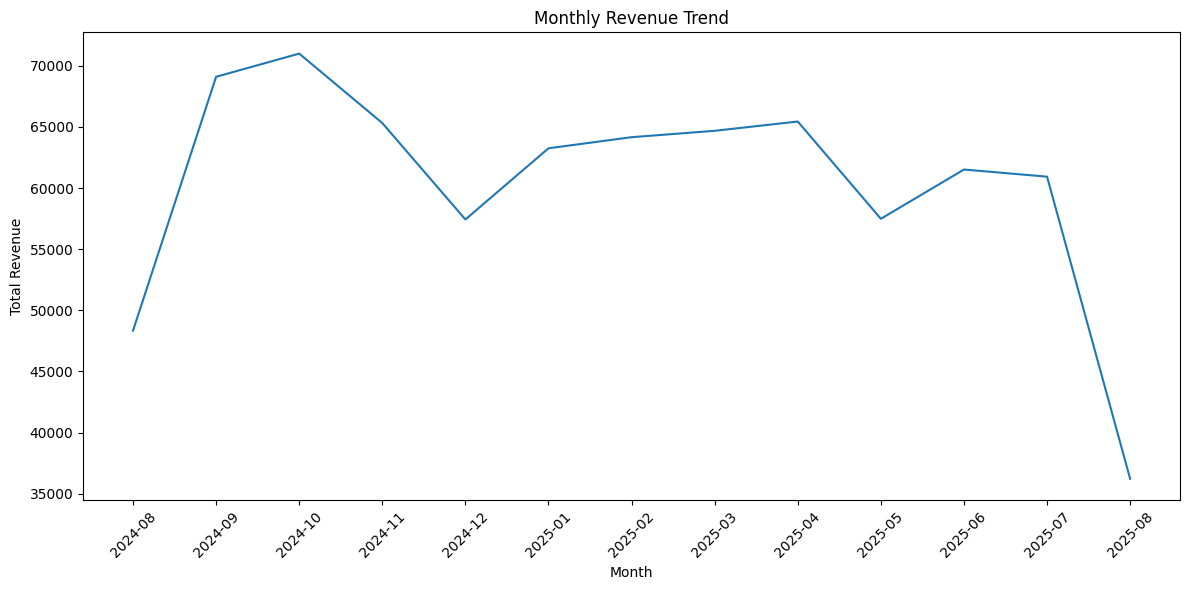

In [10]:
monthly_revenue['month_str'] = monthly_revenue['month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month_str', y='order_value')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Best-selling products

### Subtask:
Identify and display the top 10 products based on total revenue.


**Reasoning**:
Group the dataframe by product name, calculate the sum of order value, sort in descending order, and select the top 10.



In [11]:
top_10_products = df.groupby('product_name')['order_value'].sum().sort_values(ascending=False).head(10).reset_index()
display(top_10_products)

,product_name,order_value
0,Foot,26341.42
1,Rise,24222.27
2,Others,22762.70
3,Big,22497.86
4,Data,21141.56
5,Hand,20644.15
6,Society,20598.21
7,Central,20400.85
8,Wrong,20012.46
9,Operation,19814.87


## Regional performance

### Subtask:
Calculate and display the total revenue for each region.


**Reasoning**:
Group the dataframe by region and calculate the sum of order value to get the total revenue for each region, then display the result.



In [12]:
regional_revenue = df.groupby('region')['order_value'].sum().reset_index()
display(regional_revenue)

,region,order_value
0,East,186666.12
1,North,208994.98
2,South,208281.04
3,West,180933.21


## Customer segmentation

### Subtask:
Identify and display the top 20% of customers by total spending.


**Reasoning**:
Calculate the total spending for each customer, find the 80th percentile of spending, filter for customers above this threshold, sort, and display the result to identify the top 20% of customers by spending.



In [13]:
customer_spending = df.groupby('customer_id')['order_value'].sum().reset_index()
spending_threshold = customer_spending['order_value'].quantile(0.8)
top_customers = customer_spending[customer_spending['order_value'] >= spending_threshold]
top_customers = top_customers.sort_values(by='order_value', ascending=False)
display(top_customers)

,customer_id,order_value
72,74,10776.21
159,161,10608.18
96,98,9618.22
111,113,9061.65
112,114,9031.79
124,126,8852.55
190,192,8748.93
115,117,8533.88
110,112,8497.28
151,153,8335.11


## Summary:

### Data Analysis Key Findings

*   The monthly revenue trend showed fluctuations throughout the year, which is visualized in the generated line chart.
*   The top 10 best-selling products by revenue were identified, with 'Foot' being the highest earner at \$26341.42, followed by 'Rise' and 'Others'.
*   Regional performance analysis revealed the total revenue for each region: East - \$186666.12, North - \$208994.98, South - \$208281.04, and West - \$180933.21. The North and South regions generated slightly higher revenue compared to the East and West.
*   The top 20% of customers by total spending were successfully identified, providing insights into the high-value customer segment.



# Task
Analyze sales data to identify key trends, best-performing products and regions, customer segments, and low-performing products. Generate a KPI summary report in CSV format.

## Low-performing products

### Subtask:
Identify and display products with the lowest sales volume.


**Reasoning**:
Group the dataframe by product name, calculate the sum of quantity, sort in ascending order, and select the bottom 10 to identify the lowest selling products by volume.



In [14]:
lowest_selling_products = df.groupby('product_name')['quantity'].sum().sort_values(ascending=True).head(10).reset_index()
display(lowest_selling_products)

,product_name,quantity
0,Information,18
1,Although,34
2,Only,36
3,Bank,42
4,Bit,43
5,Image,43
6,Expect,45
7,Writer,45
8,Point,46
9,Analysis,46


## Export kpi summary report

### Subtask:
Create and save a CSV report summarizing key KPIs, including total revenue, repeat rate, churn rate, top region, and other relevant metrics.


**Reasoning**:
Calculate total revenue, find the top region, create a dictionary of KPIs, convert to a DataFrame, and save it as a CSV.



In [15]:
total_revenue = df['order_value'].sum()
top_region = regional_revenue.loc[regional_revenue['order_value'].idxmax(), 'region']

kpi_data = {
    'Metric': ['Total Revenue', 'Repeat Rate', 'Churn Rate', 'Top Region'],
    'Value': [total_revenue, repeat_rate, churn_rate, top_region]
}

kpi_df = pd.DataFrame(kpi_data)

kpi_df.to_csv('kpi_summary_report.csv', index=False)

## Summary:

### Data Analysis Key Findings

*   The products with the lowest sales volume were identified by summing the quantity sold for each product and sorting in ascending order. The top 10 lowest selling products were displayed.
*   Key performance indicators including total revenue, repeat rate, churn rate, and the top region were calculated and compiled into a summary report.
*   The total revenue was calculated by summing the `order_value` column.
*   The top-performing region was identified as the region with the highest `order_value`.



## Best-selling products

### Subtask:
Identify and display the top 10 products based on total revenue.

**Reasoning**:
Group the dataframe by product name, calculate the sum of order value, sort in descending order, and select the top 10.

In [ ]:
top_10_products = df.groupby('product_name')['order_value'].sum().sort_values(ascending=False).head(10).reset_index()
display(top_10_products)